<a href="https://colab.research.google.com/github/ShaoFuLiu/tSDRG_DataAnalysis/blob/master/TestSortingData_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tSDRG Data Analysis**

## Import meta data from google drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import lib

In [2]:
import os
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

## A. Bulk Correlation for OBC/PBC ##


### 1 .Fitting plot (PBC)




[ 1.19785608 -0.91308259]
[ 1.21655954 -0.99213952]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


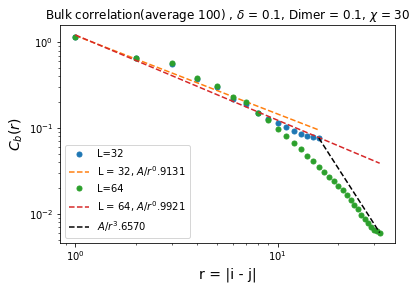

In [8]:
# Bulk Correlation 
### Plot Correlation and fitting


def func(x, a, b): ## 定義 fitting 公式 (ax^b)
    return a*x**b

BC = 'PBC'
Ls = [32, 64]
Jdis = 'Jdis01'
J = Jdis[4] + '.' + Jdis[5]
Dimer = 'Dim01'
D = Dimer[3] + '.' + Dimer[4]
P = 10
N = 100  

dftail = pd.DataFrame(columns = ['x2-x1', 'corr'])
for i in range(len(Ls)):
    L = int(Ls[i]/2)
    direc = '/content/drive/My Drive/TensorNetwork/metadata/Corr/'+ Dimer
    myfile = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P' + str(P) + '_m30_corr_AV'+ str(N) +'.csv'
    df = pd.read_csv(myfile)
    plt.plot(df['x2-x1'] ,df['corr'],".", markersize = 10, label = 'L=%d' %(Ls[i]))
    
    popt, pcov = curve_fit(func, df['x2-x1'], df['corr']) ## fitting data
    print(popt)
    a = popt[0]
    b = popt[1]
    yp = []
    for j in range(L):
        yp.append(func(df['x2-x1'][j], a ,b))
    
    plt.plot(df['x2-x1'], yp, "--", label = 'L = %s, $A/r^ %1.4f$' %(Ls[i], abs(b))) ## fitting data curve

    tail = {'x2-x1':df['x2-x1'][L-1] ,'corr': df['corr'][L-1]} ## 尾端值
    dftail.loc[i] = tail

popt1, pcov1 = curve_fit(func, dftail['x2-x1'], dftail['corr']) ## fitting 尾端值 
c = popt1[0]
d = popt1[1]
yp = []
for k in range(len(Ls)):
    yp.append(func(dftail['x2-x1'][k], c ,d))
plt.plot(dftail['x2-x1'], yp, "k--", label = '$A/r^%1.4f$' %(abs(d))) ## fitting 尾端值 curve

plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
#plt.xlim(3,32)
#plt.ylim(0.001, 1)
plt.xscale('log')
plt.yscale('log')
plt.title(r'Bulk correlation(average %d) , $\delta$ = %s, Dimer = %s, $\chi$ = 30' % (int(N), J, D), fontsize=12)
plt.legend(loc = 'best')
plt.savefig( BC +'_P'+ str(P) +'_' + Jdis + '_' + Dimer + '_m30_Corr_AV' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

## B. String Order Parameter ##

### 1 .Plot ln(L) vs ln(O^z)

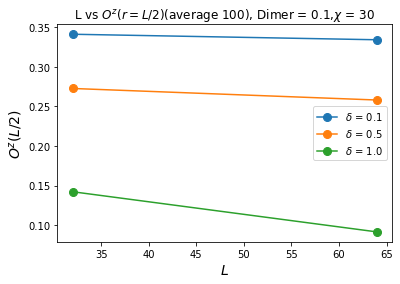

In [10]:
# String Order Parameter 
### Plot L vs Oz

BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis01','Jdis05','Jdis10']
Dimer = 'Dim01'
D = Dimer[3] + '.' + Dimer[4]
P = 10  # prob distribution type
N = 100 # total data number 

for j in range(len(Jdis)):
    J = Jdis[j][4] + '.' + Jdis[j][5]
    delta = float(J)
    dfstr = pd.DataFrame(columns = ['L', 'O^z'])
    #dfstrLOG = pd.DataFrame(columns = ['ln(L)', 'ln(O^z)'])
    
    for i in range(len(Ls)):
        direc = '/content/drive/My Drive/TensorNetwork/metadata/SOP/' + Jdis[j] + '/' + Dimer
        myfile = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P' + str(P) + '_m30_sop_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        mean = {'L':Ls[i] ,'O^z': df['corr'].mean()}
        #meanLOG = {'ln(L)':math.log(Ls[i]) ,'ln(O^z)': math.log(df['corr'].mean())}    # sometimes its can't do because sop=0
        dfstr.loc[i] = mean
        #dfstrLOG.loc[i] = mean

    plt.plot(dfstr['L'] ,dfstr['O^z'], "o-", markersize = 8, label = '$\delta$ = %s' %(delta))
    #plt.plot(dfstrLOG['ln(L)'] ,dfstrLOG['ln(O^z)'], "o-", markersize = 8, label = '$\delta$ = %s' %(delta))

plt.xlabel(r'$L$', fontsize=14)
plt.ylabel(r'$O^z(L/2)$', fontsize=14)
#plt.xlim(3.3,5.7)
# plt.ylim(-4.6, -1.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'L vs $O^z(r=L/2)$(average %d), Dimer = %s,$\chi$ = 30' % (int(N), D), fontsize=12)
plt.legend(loc = 'best')
plt.savefig( BC +'_P'+ str(P) + '_' + Dimer + '_m30_L-Oz_AV' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

### 2 .Plot delta vs O^z 

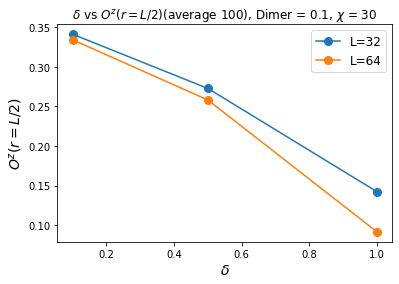

In [11]:
# String Order Parameter 
### Plot Delta vs Oz

BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis01','Jdis05','Jdis10']
Dimer = 'Dim01'
D = Dimer[3] + '.' + Dimer[4]
P = 10  # prob distribution type
N = 100 # total data number 

for i in range(len(Ls)):
    dfstr = pd.DataFrame(columns = ['delta', 'O^z'])
    
    for j in range(len(Jdis)):
        J = Jdis[j][4] + '.' + Jdis[j][5]
        delta = float(J)

        direc = '/content/drive/My Drive/TensorNetwork/metadata/SOP/' + Jdis[j] + '/' + Dimer
        myfile = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P' + str(P) + '_m30_sop_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        mean = {'delta':delta ,'O^z':df['corr'].mean()}
        dfstr.loc[j] = mean 
    
    plt.plot(dfstr['delta'] ,dfstr['O^z'],"o-", markersize = 8, label = 'L=%d' %(Ls[i]))

plt.xlabel(r'$\delta$', fontsize=14)
plt.ylabel(r'$O^z(r=L/2)$', fontsize=14)
#plt.xlim(0.1,1.5)
#plt.ylim(0, 0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'$\delta$ vs $O^z(r=L/2)$(average %d), Dimer = %s, $\chi$ = 30' % (int(N), D), fontsize=12)
plt.legend(loc = 'best',fontsize=12)
plt.savefig( BC +'_P'+ str(P) + '_' + Dimer + '_m30_Delta-Oz_AV' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

## C. Dimerization

### 1 .Plot dimer vs O^z 

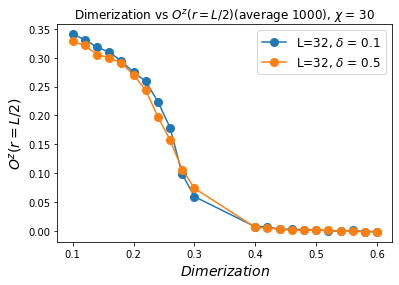

In [18]:
# Dimerization & String Order Parameter 
### Plot dimer vs O^z 

BC = 'PBC'
Ls = [32]
Jdis = ['Jdis01','Jdis05']

init_D = 10
final_D = 30
space = 2
file_num = int ((final_D - init_D)/space+1)
Dimer = []
for i in range(file_num):
    D = init_D + space*i
    d = '0'+ str(D)[0] + str(D)[1]
    Dimer.append('Dim' + d)
init_D2 = 40
for i in range(11):
    D = init_D2 + space*i
    d = '0'+ str(D)[0] + str(D)[1]
    Dimer.append('Dim' + d)

P = 20
N = 1000
init_seed = 1

arr = []
for j in range(N):
    n = str(init_seed+1)
    arr.append(n)

for i in range(len(Ls)):
    L = Ls[i]
    dfstr = pd.DataFrame(columns = ['Dimerization', 'O^z'])
    
    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5])

        myfile = '/content/drive/My Drive/TensorNetwork/metadata/SOP/'+ jdis + '/Dimer-Oz/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m30_dim-sop_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        plt.plot(df['Dimerization'] ,df['O^z'],"o-", markersize = 8, label = 'L=%d, $\delta$ = %s ' %(L, J))

plt.xlabel(r'$Dimerization$', fontsize=14)
plt.ylabel(r'$O^z(r=L/2)$', fontsize=14)
#plt.xlim(0.1,1.5)
#plt.ylim(0, 0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'Dimerization vs $O^z(r=L/2)$(average %d), $\chi$ = 30' % (int(N)), fontsize=12)
plt.legend(loc = 'best',fontsize=12)
plt.savefig( BC + '_P'+ str(P) +'_m30_N' + str(N) +'_Oz-Dimerization.pdf', format='pdf', dpi=4000)
plt.show()

### 2 .Plot dimer vs ZL

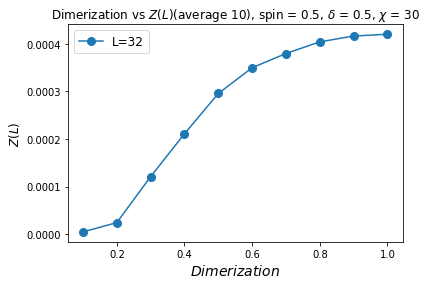

In [14]:
# Dimerization & String Order Parameter 
### Plot dimer vs ZL

spin = 0.5
BC = 'PBC'
P = 10
Ls = [32]
Jdis = ['Jdis05']
Dimer = ['Dim01','Dim02','Dim03','Dim04','Dim05','Dim06','Dim07','Dim08','Dim09','Dim10']
N = 10  
init_seed = 1

arr = []
for j in range(N):
    n = str(init_seed+1)
    arr.append(n)

for i in range(len(Ls)):
    L = Ls[i]
    dfstr = pd.DataFrame(columns = ['Dimerization', 'O^z'])
    
    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5])

        myfile = '/content/drive/My Drive/TensorNetwork/metadata/ZL/'+ jdis + '/Dimer-ZL/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m30_dim-zl_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        plt.plot(df['Dimerization'], df['ZL'], "o-", markersize = 8, label = 'L=%d' %(L))

plt.xlabel(r'$Dimerization$', fontsize=14)
plt.ylabel(r'$Z(L)$', fontsize=12)
#plt.xlim(0.1,1.5)
#plt.ylim(0, 1)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'Dimerization vs $Z(L)$(average %d), spin = %s, $\delta$ = %s, $\chi$ = 30' % (int(N), spin, J), fontsize=12)
plt.legend(loc = 'best',fontsize=12)
plt.savefig( BC + '_P'+ str(P) +'_m30_N' + str(N) +'_ZL-Dimerization.pdf', format='pdf', dpi=4000)
plt.show()

## D. Distribution of End to end correlations 

### 1 .Plot x vs lnP(x) (x = -ln(C_1(L)) )

921
3387
5341
6915
7977
8729
9199
9518
9718
9833
9913
9952
9977
9990
9994
9997


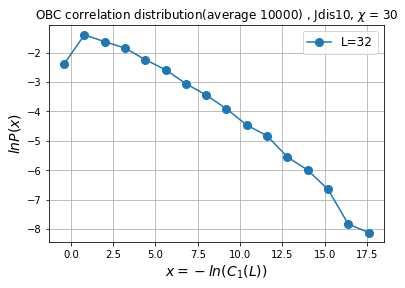

In [ ]:
## Distribution of End to end correlations 
### plot 

BC = 'OBC'
#Ls = [32, 48, 64, 96, 128, 256]
Ls = [32]
Jdis = 'Jdis10'
N = 10000

for i in range(len(Ls)):
    myfile = '/home/liusf/test/Distribution_end_to_end_correlation/L' + str(Ls[i]) + '_P10_m30_Jdis10_sum'+ str(N) +'_corr1.csv'
    df = pd.read_csv(myfile)

    up = -1
    down = 0.2
    n = 1.2
    b = 0
    df2 = pd.DataFrame(columns = ['mid', 'lnP'])

    for j in range(16):
        #print((left+right)/2)
        mid = (up+down)/2 
        selected = df[df['corr'].between(up,down)]['corr']
        up += n
        down += n
        a = len(selected)
        b += a
        print(b)
        lnP = math.log(len(selected)/10000)
        mean = {'mid':mid ,'lnP':lnP}  
        df2.loc[j] = mean

    plt.plot(df2['mid'], df2['lnP'], 'o-', markersize = 8, label = 'L=%d' %(Ls[i]))

plt.xlabel('$x = -ln(C_1(L))$', fontsize=14)
plt.ylabel('$lnP(x)$', fontsize=14)
plt.title('OBC correlation distribution(average %d) , %s, $\chi$ = 30' %(int(N), Jdis), fontsize=12)
plt.legend(loc = 'best', fontsize=12)
plt.grid()
plt.savefig( BC +'_distribution_P10_m30_'+ Jdis +'_sum'+ str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

#### plot Zlin's OBC data

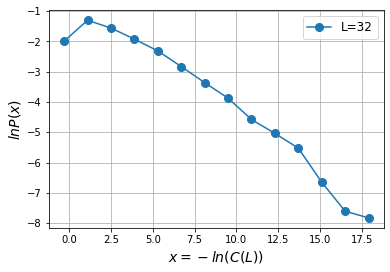

In [ ]:
## Distribution of End to end correlations 
#### plot Zlin's OBC data 

myfile = '/home/liusf/tSDRG_Results/spin_1_random_chian/Distribution_end_to_end_correlation/raw_data/OBC/Jdis10/L32_P10_m30_sum10000_corr2.csv'
df = pd.read_csv(myfile)
df['corr'] = -df['corr'].abs().apply(np.log)

N = 10000
left = -1
right = 0.4
n = 1.4
df2 = pd.DataFrame(columns = ['mid', 'lnP'])

for i in range(14):
    #print((left+right)/2)
    mid = (left+right)/2 
    selected = df[df['corr'].between(left,right)]['corr']
    left += n
    right += n
    #print(len(selected)/10000)
    lnP = math.log(len(selected)/N)
    mean = {'mid':mid ,'lnP':lnP}  
    df2.loc[i] = mean

plt.plot(df2['mid'], df2['lnP'], 'o-', markersize = 8, label = 'L=32')
plt.xlabel(r'$x = -ln(C(L))$', fontsize=14)
plt.ylabel(r'$lnP(x)$', fontsize=14)
plt.legend(loc = 'best', fontsize=12)
plt.grid()
plt.show()

## E. Distribution of Jlist

In [ ]:
## Distribution of Jlist ##
## plot ##

L = 10000
Jdis = 'J1'
Dimer = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5']
for i in range(len(Dimer)):
    myfile = '/home/liusf/test/spin1/Distribution_Jdis/'+ Jdis + Dimer[i] +'_list.csv'
    df = pd.read_csv(myfile)
    up = 0
    down = 0.05
    n = 0.05
    df1 = pd.DataFrame(columns = ['mid', 'Prob'])
    df2 = pd.DataFrame(columns = ['mid', 'Prob'])
    """
    plt.plot(np.array(df['J2']), 'o', markersize = 8)
    print(np.array(df['J2']))
    """
    for j in range(40):
        #selected1 = df[df['J'].between(up,down)]['J']
        selected2 = df[df['J2'].between(up,down)]['J2']
        mid = (up+down)/2 
        up += n
        down += n
        #Prob1 = len(selected1)/L
        Prob2 = len(selected2)/L
        #mean1 = {'mid':mid ,'Prob':Prob1}
        mean2 = {'mid':mid ,'Prob':Prob2}
        #df1.loc[j] = mean1
        df2.loc[j] = mean2
    plt.plot(df1['mid'], df1['Prob'], 'o-', markersize = 8)
    plt.plot(df2['mid'], df2['Prob'], 'o-', markersize = 8, label = 'Dimer = %s' %(Dimer[i]))
#df['J2'].hist()

plt.xlabel('$J$', fontsize=14)
plt.ylabel('$P(J)$', fontsize=14)
plt.title(Jdis + 'D1toD5_power-law_distribution', fontsize=12)
#plt.xlim(0,1)
#plt.ylim(0,0.1)
plt.legend(loc = 'best', fontsize=12)
plt.grid()
plt.savefig('/home/liusf/test/spin1/Distribution_Jdis/'+ Jdis + Dimer +'_power-law_distribution.pdf', format='pdf', dpi=4000)
#plt.savefig('/home/liusf/test/spin1/Distribution_Jdis/D1toD5_distribution.pdf', format='pdf', dpi=4000)
plt.show()